In [253]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys
sys.path.append("../")
import gyrochrones as gyr

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=1)
pl.rc('legend', fontsize=20)

%matplotlib inline

In [254]:
df = pd.read_hdf('../data/good.h5')

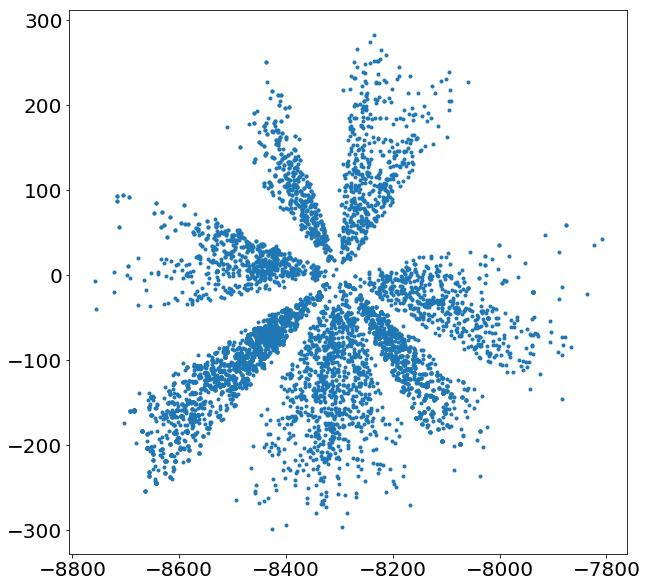

In [255]:
pl.figure(figsize=(10, 10))
pl.plot(df['galcen_x'], df['galcen_y'], '.')

/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


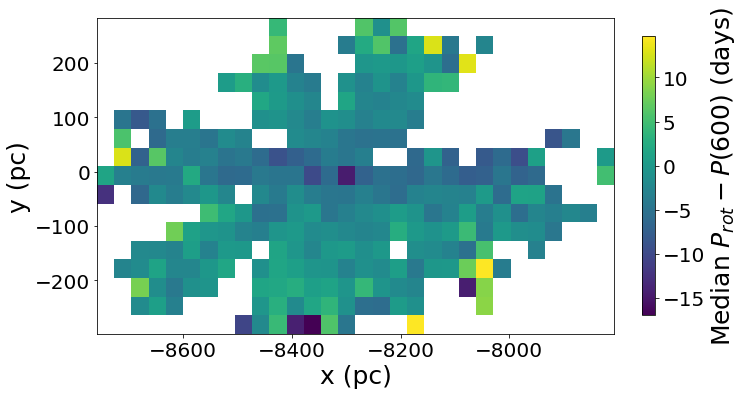

In [256]:
from scipy.stats import binned_statistic_2d

gyr_age = 600
gyrochrone = gyr.MM09e3(df['B_V'], gyr_age)
finite_age_mask = np.isfinite(gyrochrone)
color_mask = (df['B_V'] > 0.5) & (df['B_V'] < 3.0)
perdiff = (np.exp(df['logperiod_mean'][finite_age_mask & color_mask]) - 
           gyrochrone[finite_age_mask & color_mask])


ret = binned_statistic_2d(df['galcen_x'][finite_age_mask & color_mask], 
                          df['galcen_y'][finite_age_mask & color_mask], 
                          perdiff, statistic='median', bins=[30, 17])
pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest', 
         extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]))
cb = pl.colorbar(im, fraction=0.025)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("x (pc)")
pl.ylabel("y (pc)")
pl.savefig("xy_bins.pdf")

/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


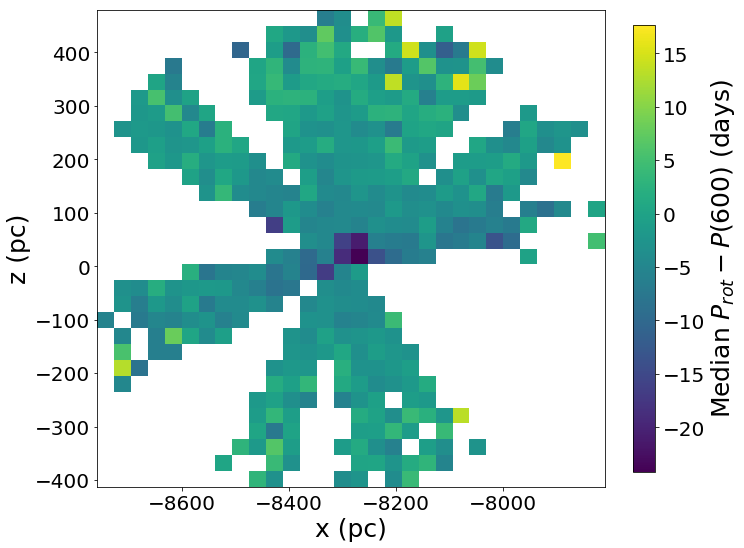

In [257]:
ret = binned_statistic_2d(df['galcen_x'][finite_age_mask & color_mask], 
                          df['galcen_z'][finite_age_mask & color_mask], 
                          perdiff, statistic='median', bins=[30, 30])
pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest', 
         extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]))
cb = pl.colorbar(im, fraction=0.04)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("x (pc)")
pl.ylabel("z (pc)")
pl.savefig("xz_bins.pdf")

/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


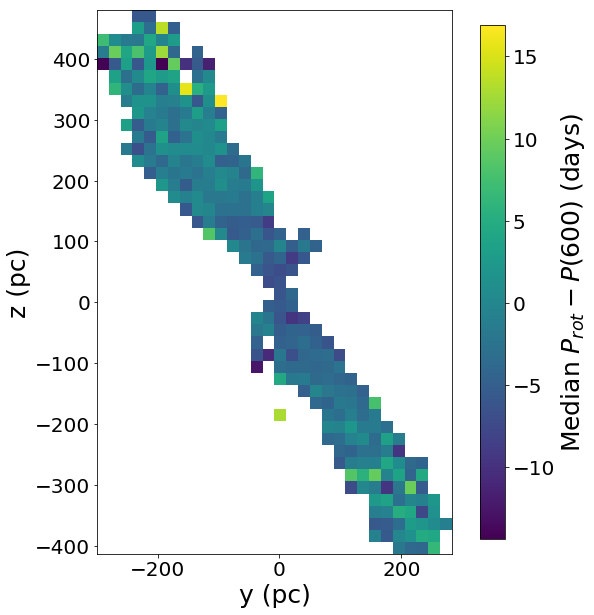

In [258]:
ret = binned_statistic_2d(df['galcen_y'][finite_age_mask & color_mask], 
                          df['galcen_z'][finite_age_mask & color_mask], 
                          perdiff, statistic='median', bins=[30, 45])
pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest',
         extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]))
cb = pl.colorbar(im, fraction=0.046)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("y (pc)")
pl.ylabel("z (pc)")
pl.savefig("yz_bins.pdf")

/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


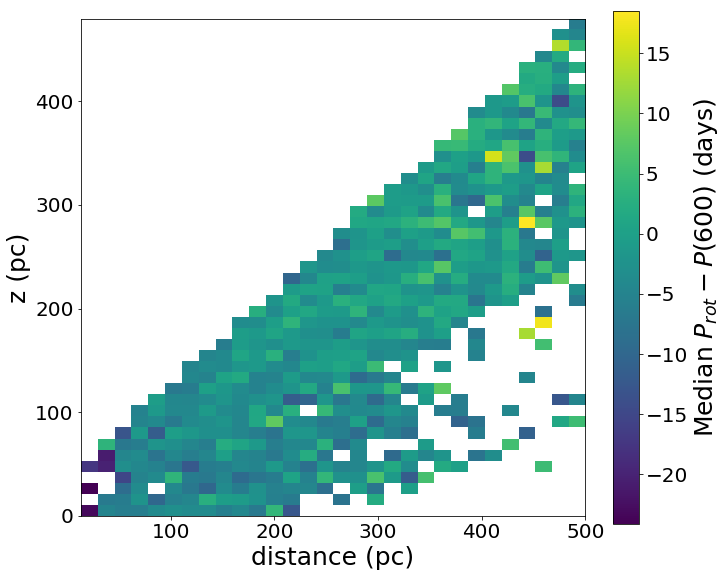

In [259]:
ret = binned_statistic_2d(np.abs(df['r_est'][finite_age_mask & color_mask]), 
                          np.abs(df['galcen_z'][finite_age_mask & color_mask]), 
                          perdiff, statistic='median', bins=[30, 45])
pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest',
         extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]))
cb = pl.colorbar(im, fraction=0.046)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("distance (pc)")
pl.ylabel("z (pc)")
pl.savefig("rz_bins.pdf")

/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


Text(0,0.5,'z (pc)')

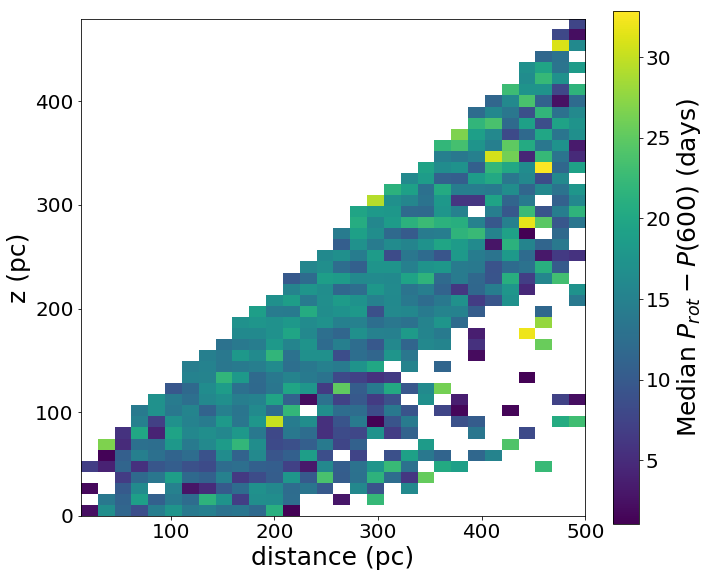

In [260]:
ret = binned_statistic_2d(np.abs(df['r_est'][finite_age_mask & color_mask]), 
                          np.abs(df['galcen_z'][finite_age_mask & color_mask]), 
                          np.exp(df['logperiod_mean'][finite_age_mask & color_mask]), 
                          statistic='median', bins=[30, 45])
pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest',
         extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]))
cb = pl.colorbar(im, fraction=0.046)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("distance (pc)")
pl.ylabel("z (pc)")

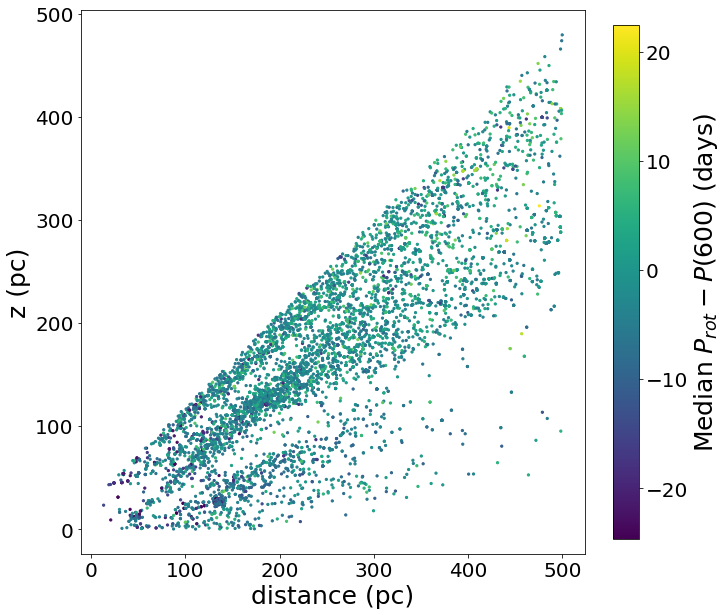

In [261]:
pl.figure(figsize=(10, 10))
pl.scatter(np.abs(df['r_est'][finite_age_mask & color_mask]), 
           np.abs(df['galcen_z'][finite_age_mask & color_mask]), 
           c=perdiff, s=5)
cb = pl.colorbar(fraction=0.046)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("distance (pc)")
pl.ylabel("z (pc)")
pl.savefig("rz_scatter.pdf")

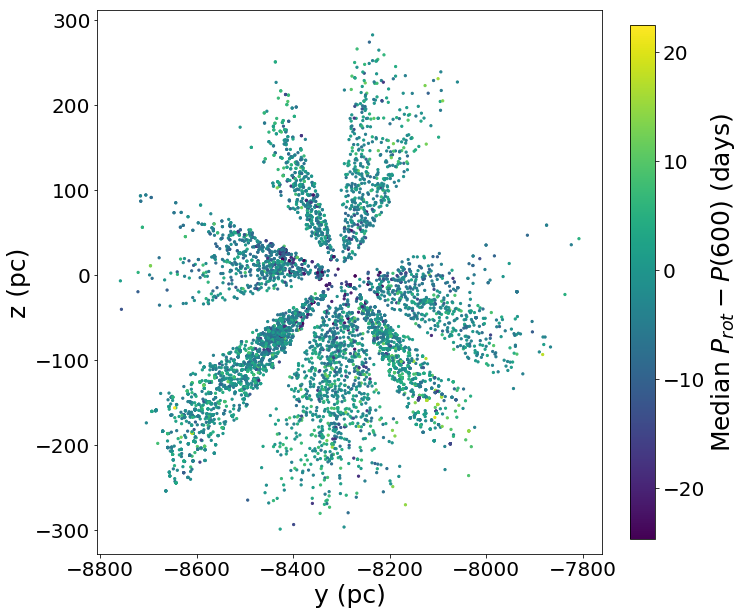

In [262]:
pl.figure(figsize=(10, 10))
pl.scatter(df['galcen_x'][finite_age_mask & color_mask], 
           df['galcen_y'][finite_age_mask & color_mask], 
           c=perdiff, s=5)
cb = pl.colorbar(fraction=0.046)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("y (pc)")
pl.ylabel("z (pc)")
pl.savefig("xy_scatter.pdf")

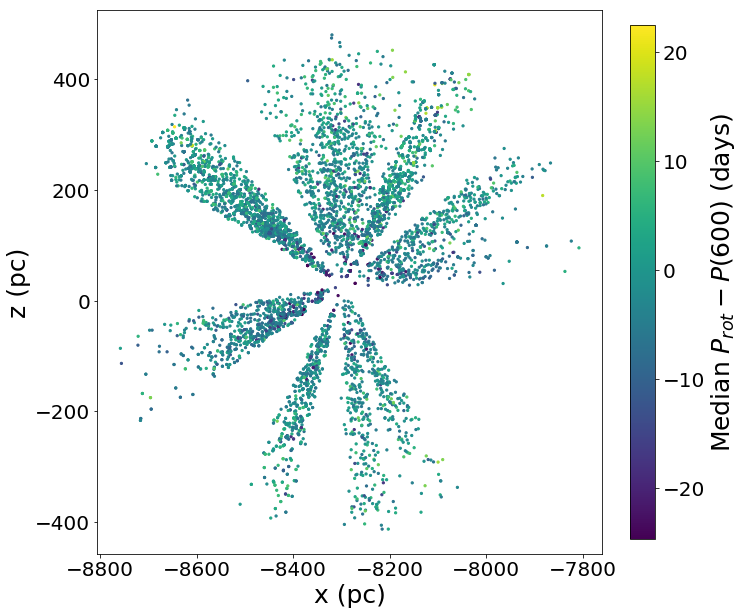

In [263]:
pl.figure(figsize=(10, 10))
pl.scatter(df['galcen_x'][finite_age_mask & color_mask], 
           df['galcen_z'][finite_age_mask & color_mask], 
           c=perdiff, s=5)
cb = pl.colorbar(fraction=0.046)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("x (pc)")
pl.ylabel("z (pc)")
pl.savefig("xz_scatter.pdf")

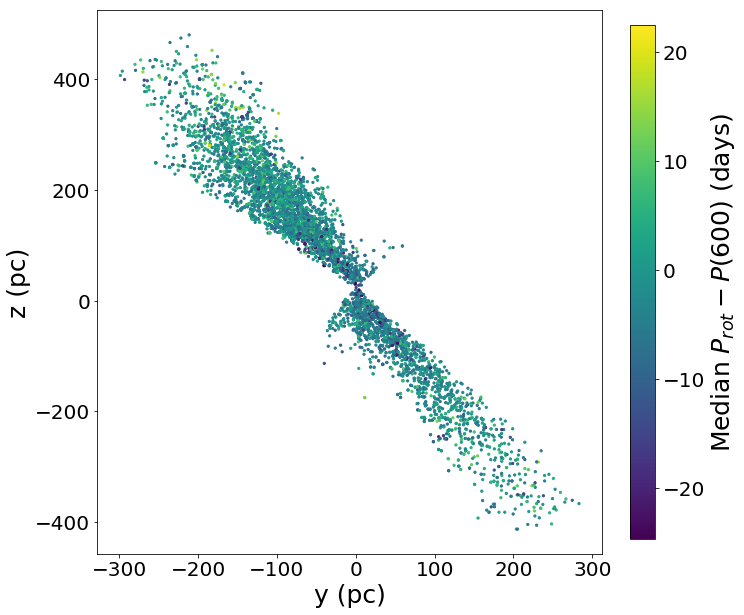

In [264]:
pl.figure(figsize=(10, 10))
pl.scatter(df['galcen_y'][finite_age_mask & color_mask], 
           df['galcen_z'][finite_age_mask & color_mask], 
           c=perdiff, s=5)
cb = pl.colorbar(fraction=0.046)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("y (pc)")
pl.ylabel("z (pc)")
pl.savefig("yz_scatter.pdf")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


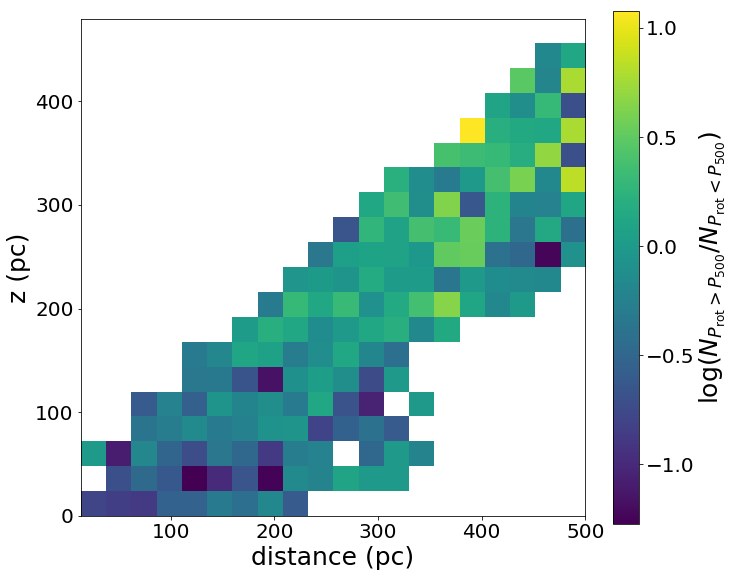

In [281]:
gyr_age = 500
gyrochrone = gyr.MM09e3(df['B_V'], gyr_age)
perdiff = (np.exp(df['logperiod_mean'][finite_age_mask & color_mask]) - 
           gyrochrone[finite_age_mask & color_mask])

def balance(x):
    lower = np.sum(x < 0)
    upper = np.sum(x > 0)
    if lower != 0:
        return np.log10(upper/lower)
    else:
        return np.nan

ret = binned_statistic_2d(df['r_est'][finite_age_mask & color_mask], 
                          np.abs(df['galcen_z'][finite_age_mask & color_mask]), 
                          perdiff, statistic=balance, bins=[20, 20])

pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest',
         extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]))
cb = pl.colorbar(im, fraction=0.046)
cb.set_label('$\log(N_{P_\mathrm{rot} > P_{500}}/N_{P_\mathrm{rot} < P_{500}})$')
pl.xlabel("distance (pc)")
pl.ylabel("z (pc)")
pl.savefig("rz_balance.pdf")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


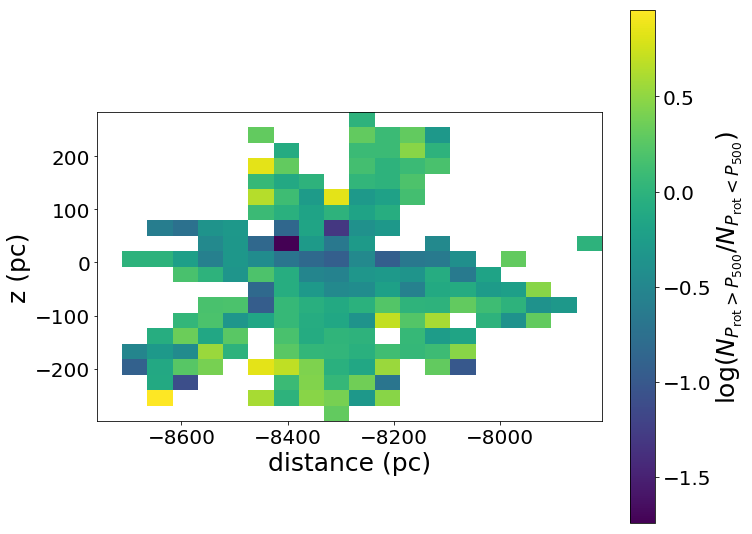

In [280]:
gyr_age = 500
gyrochrone = gyr.MM09e3(df['B_V'], gyr_age)
perdiff = (np.exp(df['logperiod_mean'][finite_age_mask & color_mask]) - 
           gyrochrone[finite_age_mask & color_mask])

def balance(x):
    lower = np.sum(x < 0)
    upper = np.sum(x > 0)
    if lower != 0:
        return np.log10(upper/lower)
    else:
        return np.nan

ret = binned_statistic_2d(df['galcen_x'][finite_age_mask & color_mask], 
                          df['galcen_y'][finite_age_mask & color_mask], 
                          perdiff, statistic=balance, bins=[20, 20])

pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest',
         extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]))
cb = pl.colorbar(im, fraction=0.046)
cb.set_label('$\log(N_{P_\mathrm{rot} > P_{500}}/N_{P_\mathrm{rot} < P_{500}})$')
pl.xlabel("distance (pc)")
pl.ylabel("z (pc)")
pl.savefig("xy_balance.pdf")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


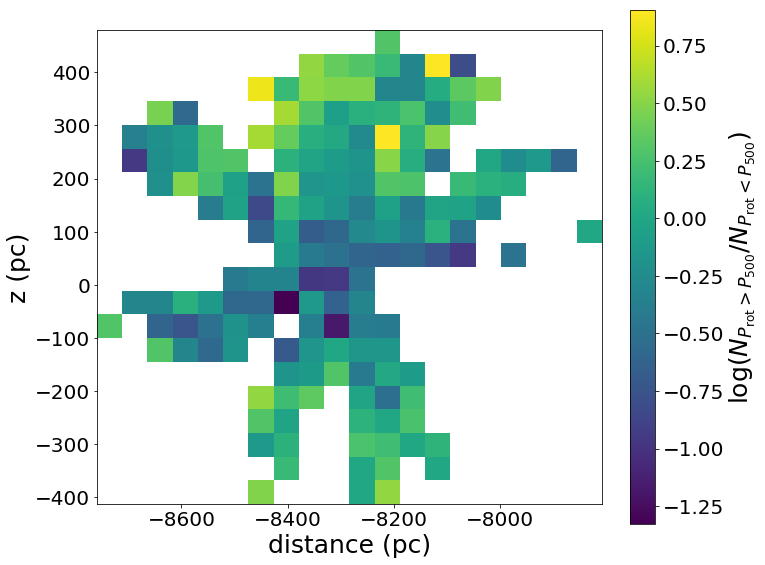

In [279]:
gyr_age = 500
gyrochrone = gyr.MM09e3(df['B_V'], gyr_age)
perdiff = (np.exp(df['logperiod_mean'][finite_age_mask & color_mask]) - 
           gyrochrone[finite_age_mask & color_mask])

def balance(x):
    lower = np.sum(x < 0)
    upper = np.sum(x > 0)
    if lower != 0:
        return np.log10(upper/lower)
    else:
        return np.nan

ret = binned_statistic_2d(df['galcen_x'][finite_age_mask & color_mask], 
                          df['galcen_z'][finite_age_mask & color_mask], 
                          perdiff, statistic=balance, bins=[20, 20])

pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest',
         extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]))
cb = pl.colorbar(im, fraction=0.046)
cb.set_label('$\log(N_{P_\mathrm{rot} > P_{500}}/N_{P_\mathrm{rot} < P_{500}})$')
pl.xlabel("distance (pc)")
pl.ylabel("z (pc)")
pl.savefig("xz_balance.pdf")